### Assignment 3
##### Language: Python
##### Dataset: Melbourne_housing.csv
##### Author: Manickashree Thayumana Sundaram
##### Group 6: Manickashree Thayumana Sundaram, Yuxin (Raychel) Yi, Tien (Candice) Her, 

In [4]:
### Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC

In [5]:
## Load the dataset
mh_df = pd.read_csv('Melbourne_housing.csv')
#print(mh_df.head(10))
mh_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
## Dropping missing values from Price column
mh_df_P = mh_df.dropna(subset = ['Price'])
mh_df_P

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Thornbury,7/67 Pender St,2,u,438000.0,SP,Love,22/08/2016,6.5,3071,...,1.0,1.0,0.0,66.0,1970.0,Darebin City Council,-37.75410,145.00880,Northern Metropolitan,8870
1,Coburg,32 Rose St,2,h,901000.0,S,Peter,27/06/2016,7.8,3058,...,1.0,1.0,545.0,107.0,1940.0,Darebin City Council,-37.74450,144.94710,Northern Metropolitan,11204
2,Bentleigh East,2/25 Brooks St,3,u,800000.0,S,Woodards,28/05/2016,13.9,3165,...,2.0,2.0,261.0,NaN,NaN,Glen Eira City Council,-37.91630,145.07790,Southern Metropolitan,10969
3,Templestowe Lower,2/35 John St,3,t,1155000.0,S,Jellis,25/11/2017,12.4,3107,...,NaN,NaN,NaN,NaN,NaN,Manningham City Council,NaN,NaN,Eastern Metropolitan,5420
4,South Yarra,1/35 Marne St,3,u,1630000.0,PI,Jellis,10/9/2016,3.3,3141,...,1.0,1.0,0.0,NaN,NaN,Melbourne City Council,-37.83590,144.98390,Southern Metropolitan,14887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,Fawkner,8 Baird St,2,h,761000.0,S,Ray,24/06/2017,13.1,3060,...,1.0,2.0,665.0,30.0,NaN,Hume City Council,-37.70673,144.97108,Northern Metropolitan,5070
494,Sunshine,74 Hertford Rd,2,h,965000.0,S,Barry,26/08/2017,10.5,3020,...,1.0,1.0,NaN,NaN,NaN,Brimbank City Council,-37.78227,144.84038,Western Metropolitan,3755
495,Springvale,15 Phillip Av,3,h,721000.0,S,Hall,24/06/2017,20.8,3171,...,NaN,NaN,NaN,NaN,NaN,Greater Dandenong City Council,NaN,NaN,South-Eastern Metropolitan,7412
496,Middle Park,150 Page St,3,h,1750000.0,VB,Greg,27/05/2017,3.0,3206,...,2.0,0.0,138.0,155.0,1885.0,Port Phillip City Council,-37.84962,144.95856,Southern Metropolitan,2019


In [7]:
## Handling missing values in other columns
mh_df_P['Bedroom2'] = mh_df_P['Bedroom2'].fillna(0)
mh_df_P['Bathroom'] = mh_df_P['Bathroom'].fillna(1)
mh_df_P['Car'] = mh_df_P['Car'].fillna(0)
mh_df_P['Landsize'] = mh_df_P['Landsize'].fillna(mh_df_P['Landsize'].mean())
mh_df_P['BuildingArea'] = mh_df_P['BuildingArea'].fillna(mh_df_P['BuildingArea'].mean())
print(mh_df_P.head(20))

               Suburb                Address  Rooms Type      Price Method  \
0           Thornbury         7/67 Pender St      2    u   438000.0     SP   
1              Coburg             32 Rose St      2    h   901000.0      S   
2      Bentleigh East         2/25 Brooks St      3    u   800000.0      S   
3   Templestowe Lower           2/35 John St      3    t  1155000.0      S   
4         South Yarra          1/35 Marne St      3    u  1630000.0     PI   
6             Prahran           7 Trinian St      3    h  2400000.0     VB   
7           Fairfield          250 Arthur St      3    h  1145000.0      S   
8    Hoppers Crossing        23 Cleveland Dr      3    h   530000.0      S   
9           Dandenong          1/54 Jones Rd      2    u   433000.0      S   
11            Tarneit        125 Isabella Wy      3    h   461000.0      S   
12      Hawthorn East           14 Harts Pde      4    h  2735000.0      S   
14           St Kilda      77/151 Fitzroy St      1    u   40000

/var/folders/_n/zlsv0l8x3pdgl3y2ws_9tbfm0000gn/T/ipykernel_1220/374762565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mh_df_P['Bedroom2'] = mh_df_P['Bedroom2'].fillna(0)
/var/folders/_n/zlsv0l8x3pdgl3y2ws_9tbfm0000gn/T/ipykernel_1220/374762565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mh_df_P['Bathroom'] = mh_df_P['Bathroom'].fillna(1)
/var/folders/_n/zlsv0l8x3pdgl3y2ws_9tbfm0000gn/T/ipykernel_1220/374762565.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [8]:
## Listing the number of missing values in each column
c = mh_df_P.isnull().sum()
print(c)

Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Date               0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car                0
Landsize           0
BuildingArea       0
YearBuilt        213
CouncilArea        0
Lattitude         88
Longtitude        88
Regionname         0
Propertycount      0
dtype: int64


##### Since Price is our dependent variable, I have dropped rows where price values are missing. Furthermore, for attributes Bedroom and Car I have replaced the missing values with 0 and for Bathroom its replaced by 1. For features like Landsize and BuildingArea the missing values are replaced by their respective mean values.

In [9]:
mh_df_clean = mh_df_P.copy()
mh_df_clean = mh_df_clean.loc[:, ~mh_df_clean.columns.str.contains('^Unnamed')]
mh_df_clean = mh_df_P.drop('Lattitude', axis = 1)
mh_df_clean = mh_df_clean.drop('Longtitude', axis = 1)


##### Dropping features like Lattitude and Longtitude from the dataset.

In [10]:
cl = mh_df_clean.isnull().sum()
print(cl)

Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Date               0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car                0
Landsize           0
BuildingArea       0
YearBuilt        213
CouncilArea        0
Regionname         0
Propertycount      0
dtype: int64


In [11]:
mh_df_clean.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,Thornbury,7/67 Pender St,2,u,438000.0,SP,Love,22/08/2016,6.5,3071,2.0,1.0,1.0,0.000000,66.000000,1970.0,Darebin City Council,Northern Metropolitan,8870
1,Coburg,32 Rose St,2,h,901000.0,S,Peter,27/06/2016,7.8,3058,2.0,1.0,1.0,545.000000,107.000000,1940.0,Darebin City Council,Northern Metropolitan,11204
2,Bentleigh East,2/25 Brooks St,3,u,800000.0,S,Woodards,28/05/2016,13.9,3165,3.0,2.0,2.0,261.000000,144.172785,NaN,Glen Eira City Council,Southern Metropolitan,10969
3,Templestowe Lower,2/35 John St,3,t,1155000.0,S,Jellis,25/11/2017,12.4,3107,0.0,1.0,0.0,525.146067,144.172785,NaN,Manningham City Council,Eastern Metropolitan,5420
4,South Yarra,1/35 Marne St,3,u,1630000.0,PI,Jellis,10/9/2016,3.3,3141,3.0,1.0,1.0,0.000000,144.172785,NaN,Melbourne City Council,Southern Metropolitan,14887
6,Prahran,7 Trinian St,3,h,2400000.0,VB,Marshall,6/1/2018,4.6,3181,3.0,2.0,0.0,525.146067,144.172785,NaN,Stonnington City Council,Southern Metropolitan,7717
7,Fairfield,250 Arthur St,3,h,1145000.0,S,McGrath,28/08/2016,5.8,3078,3.0,1.0,3.0,590.000000,144.172785,NaN,Darebin City Council,Northern Metropolitan,2970
8,Hoppers Crossing,23 Cleveland Dr,3,h,530000.0,S,hockingstuart,3/6/2017,18.4,3029,3.0,2.0,2.0,530.000000,144.172785,NaN,Wyndham City Council,Western Metropolitan,13830
9,Dandenong,1/54 Jones Rd,2,u,433000.0,S,Stockdale,28/10/2017,24.7,3175,0.0,1.0,0.0,525.146067,144.172785,NaN,Greater Dandenong City Council,South-Eastern Metropolitan,10894
11,Tarneit,125 Isabella Wy,3,h,461000.0,S,Greg,11/11/2017,18.4,3029,3.0,2.0,2.0,301.000000,144.172785,NaN,Wyndham City Council,Western Metropolitan,10160


#### ** Q1. Data Exploration and Visualization** (15 pts):
- Explore the Melbourne house dataset.

- Provide visualizations such as histograms, scatter plots, or box plots to understand the distribution of different features.

- Include any other plots you find interesting and provide brief interpretations.



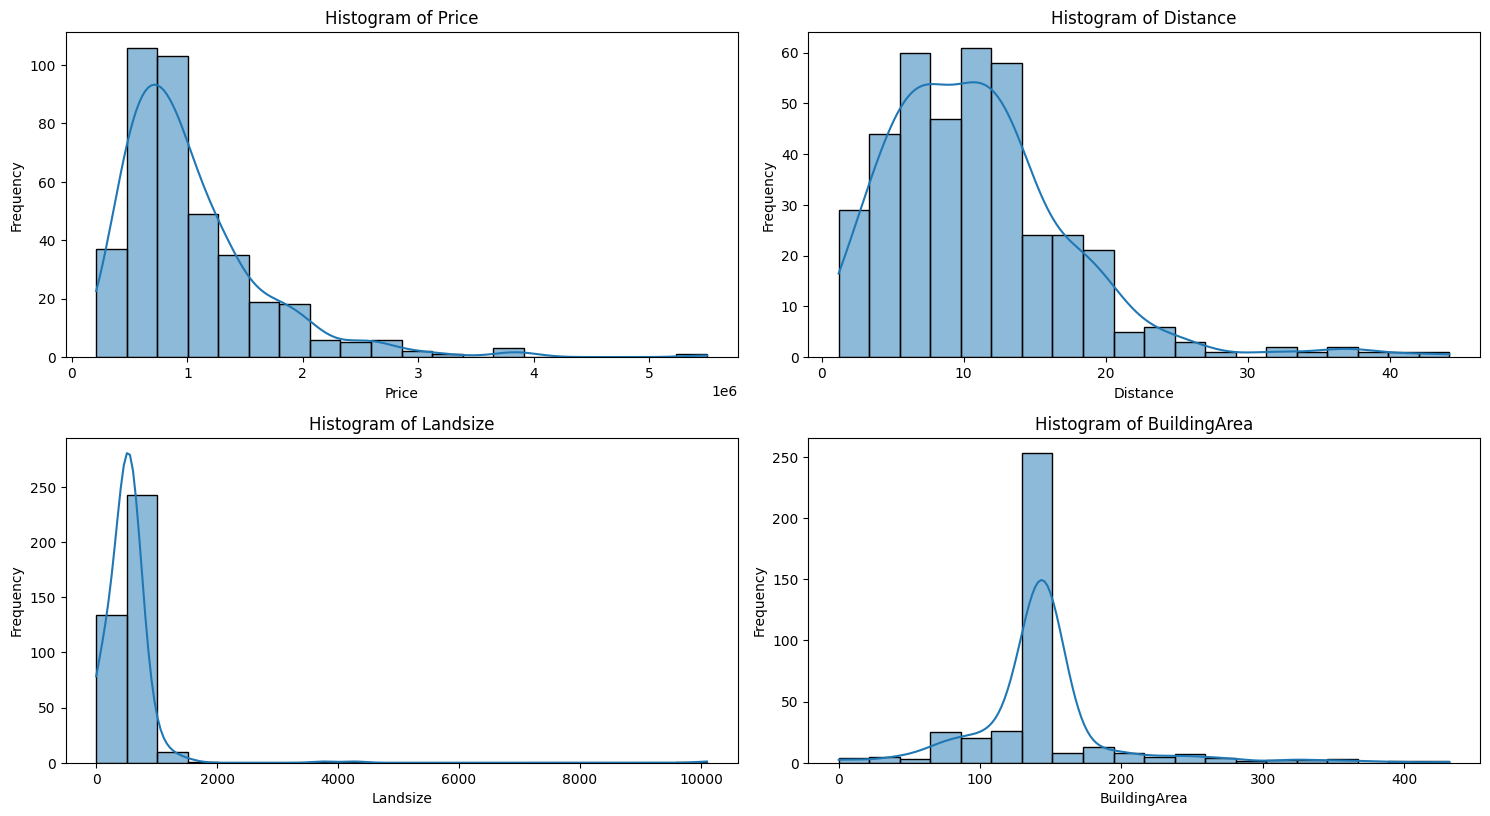

In [12]:
### Histogram
plt.figure(figsize = (15,20))
feature_1 = ['Price', 'Distance', 'Landsize', 'BuildingArea']

for i,feature in enumerate(feature_1):
    plt.subplot(5,2,i+1)
    sns.histplot(mh_df_clean[feature], kde = True, bins = 20)
    plt.xlabel(feature)
    plt.title(f'Histogram of {feature}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
    

##### The histogram of Price is right-skewed and this indicates that the majority of the properties fall in the lower price range while there are very few properties that lie in the higher price range.
##### The histogram of Landsize is also right-skewed indicating that there are more properties with landsize less than 2000 meters.
##### The histogram of Distance is right-skewed but not as much as Price and Lansize. This histogram shows that most of the houses are closer to CBD.
##### The histogram of Building Area is normally distributed and the building area for most of the properties is between 100 and 200.

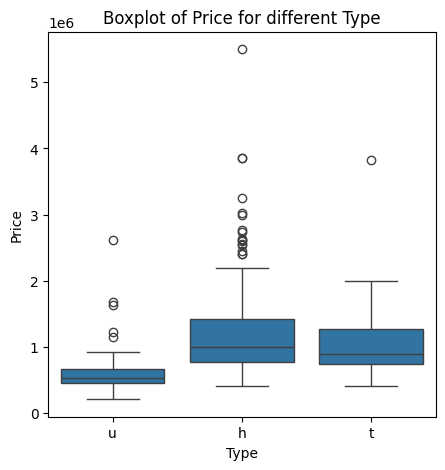

In [13]:
### Box Plot
plt.figure(figsize = (5,5))
sns.boxplot(x = 'Type', y = 'Price', data = mh_df)
plt.xlabel('Type')
plt.ylabel('Price')
plt.title('Boxplot of Price for different Type')
plt.show()

##### The box plot depicts that they are many outliers present for the house of Type h, which indicates that they are some properties which are high priced than the median. Also Type u has the lowest median price and has the smallest variablity in price range. Type t has less outliers compared to other two types

Text(0.5, 1.0, 'Scatter plot of Building Area and Price')

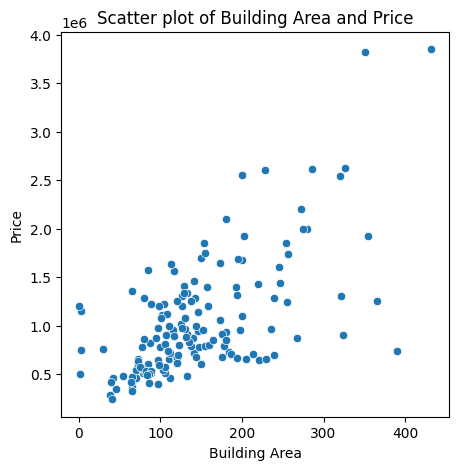

In [14]:
### Scatter Plot
plt.figure(figsize = (5,5))
sns.scatterplot(x= 'BuildingArea', y='Price', data=mh_df)
plt.xlabel('Building Area')
plt.ylabel('Price')
plt.title('Scatter plot of Building Area and Price')

##### The scatter plot shows a positive correlation between building area and property price, indicating that the price of the property increases as the building area increases, and vice versa.

#### Q2  Linear Regression Model Development 
- Develop a Linear regression model to predict price of house in Melbourne.

- Preprocess the data as necessary (handling missing values, encoding categorical variables, removing unnecessary columns etc.).

- Explain the steps you took in preparing the data and developing the model.

- You might need to encode the values for your prediction.

In [15]:
mh_df_clean.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname',
       'Propertycount'],
      dtype='object')

In [16]:
## Creating Dummy for Type column
mh_df_type_dumm = pd.get_dummies(mh_df_clean['Type'], prefix = 'Type') 
# df_encoded = pd.get_dummies(df, columns=['Color'])

mh_df_clean = pd.concat([mh_df_clean, mh_df_type_dumm], axis = 1)
print(mh_df_clean)

                Suburb         Address  Rooms Type      Price Method  \
0            Thornbury  7/67 Pender St      2    u   438000.0     SP   
1               Coburg      32 Rose St      2    h   901000.0      S   
2       Bentleigh East  2/25 Brooks St      3    u   800000.0      S   
3    Templestowe Lower    2/35 John St      3    t  1155000.0      S   
4          South Yarra   1/35 Marne St      3    u  1630000.0     PI   
..                 ...             ...    ...  ...        ...    ...   
493            Fawkner      8 Baird St      2    h   761000.0      S   
494           Sunshine  74 Hertford Rd      2    h   965000.0      S   
495         Springvale   15 Phillip Av      3    h   721000.0      S   
496        Middle Park     150 Page St      3    h  1750000.0     VB   
497            Glenroy   14 William St      3    h   501000.0     SP   

      SellerG        Date  Distance  Postcode  ...  Car    Landsize  \
0        Love  22/08/2016       6.5      3071  ...  1.0    0.000

In [17]:
## Assigning 0 and 1 to the dummies 
mh_df_clean['Type_h'] = np.where(mh_df_clean['Type_h'] == True, 1,0)
mh_df_clean['Type_t'] = np.where(mh_df_clean['Type_t'] == True, 1,0)
mh_df_clean['Type_u'] = np.where(mh_df_clean['Type_u'] == True, 1,0)
print(mh_df_clean)

                Suburb         Address  Rooms Type      Price Method  \
0            Thornbury  7/67 Pender St      2    u   438000.0     SP   
1               Coburg      32 Rose St      2    h   901000.0      S   
2       Bentleigh East  2/25 Brooks St      3    u   800000.0      S   
3    Templestowe Lower    2/35 John St      3    t  1155000.0      S   
4          South Yarra   1/35 Marne St      3    u  1630000.0     PI   
..                 ...             ...    ...  ...        ...    ...   
493            Fawkner      8 Baird St      2    h   761000.0      S   
494           Sunshine  74 Hertford Rd      2    h   965000.0      S   
495         Springvale   15 Phillip Av      3    h   721000.0      S   
496        Middle Park     150 Page St      3    h  1750000.0     VB   
497            Glenroy   14 William St      3    h   501000.0     SP   

      SellerG        Date  Distance  Postcode  ...  Car    Landsize  \
0        Love  22/08/2016       6.5      3071  ...  1.0    0.000

In [18]:
## Dropping Type_h(house,cottage,villa, semi,terrace) column
mh_df_clean = mh_df_clean.drop('Type_h', axis = 1)
print(mh_df_clean)

                Suburb         Address  Rooms Type      Price Method  \
0            Thornbury  7/67 Pender St      2    u   438000.0     SP   
1               Coburg      32 Rose St      2    h   901000.0      S   
2       Bentleigh East  2/25 Brooks St      3    u   800000.0      S   
3    Templestowe Lower    2/35 John St      3    t  1155000.0      S   
4          South Yarra   1/35 Marne St      3    u  1630000.0     PI   
..                 ...             ...    ...  ...        ...    ...   
493            Fawkner      8 Baird St      2    h   761000.0      S   
494           Sunshine  74 Hertford Rd      2    h   965000.0      S   
495         Springvale   15 Phillip Av      3    h   721000.0      S   
496        Middle Park     150 Page St      3    h  1750000.0     VB   
497            Glenroy   14 William St      3    h   501000.0     SP   

      SellerG        Date  Distance  Postcode  ...  Bathroom  Car    Landsize  \
0        Love  22/08/2016       6.5      3071  ...    

In [19]:
mh_df_clean.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname',
       'Propertycount', 'Type_t', 'Type_u'],
      dtype='object')

In [20]:
## Model
formula = 'Price ~ Rooms + Type_t + Type_u + Distance + Bedroom2 + Bathroom + Car + Landsize'

## Performing linear regression
model_mh = smf.ols(formula = formula , data = mh_df_clean).fit()
model_mh.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     38.60
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           7.82e-45
Time:                        22:00:44   Log-Likelihood:                -5662.5
No. Observations:                 391   AIC:                         1.134e+04
Df Residuals:                     382   BIC:                         1.138e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.207e+05   1.16e+05      4.478      0.000    2.92e+05    7.49e+05
Rooms       2.435e+05   3.85e+04      6.319      0.000    1.68e+05    3.19e+05
Type_t     -2.374e+05   8.07e+04     -2.941      0.003   -3.96e+05   -7.87e+04
Type_u     -3.632e+05    7.3e+04     -4.979      0.000   -5.07e+05    -2.2e+05
Distance   -3.762e+04   3921.003     -9.594      0.000   -4.53e+04   -2.99e+04
Bedroom2   -9.037e+04   2.67e+04     -3.387      0.001   -1.43e+05   -3.79e+04
Bathroom    3.063e+05   4.61e+04      6.650      0.000    2.16e+05    3.97e+05
Car         5.817e+04   3.08e+04      1.886      0.060   -2459.131    1.19e+05
Landsize      22.3044     40.808      0.547      0.585     -57.932     102.541
==============================================================================
Omnibus:                      205.632   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1730.545
Skew:                           2.076   Prob(JB):                         0.00
Kurtosis:                      12.433   Cond. No.                     4.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### A linear regression model is developed to predict the price of the house. The independent variable that I have considered are Rooms, Type, Distance, Bedroom2, Bathroom, Car, and Landsize. For the feature 'Type' dummies are created and "house,cottage,villa, semi,terrace" category was dropped from the dataset. The linear regression model has a R-squared of 0.447 which is low since the dataset had many missing values. 
##### Since Price is our dependent variable, I have dropped rows where price values are missing. Furthermore, for attributes Bedroom and Car I have replaced the missing values with 0 and for Bathroom its replaced by 1. For features like Landsize and BuildingArea the missing values are replaced by their respective mean values. Features like Lattitude and Longtitude are dropped from the dataset.
##### Dummies are created for the feature Type(Type_u, Type_h and Type_t) and Type_h was dropped to avoid multicollinerity in the dataset.


In [21]:
X = mh_df_clean.loc[:, ['Rooms' , 'Type_t' , 'Type_u' , 'Distance' , 'Bedroom2' , 'Bathroom' , 'Car' , 'Landsize']]
print(X)

     Rooms  Type_t  Type_u  Distance  Bedroom2  Bathroom  Car    Landsize
0        2       0       1       6.5       2.0       1.0  1.0    0.000000
1        2       0       0       7.8       2.0       1.0  1.0  545.000000
2        3       0       1      13.9       3.0       2.0  2.0  261.000000
3        3       1       0      12.4       0.0       1.0  0.0  525.146067
4        3       0       1       3.3       3.0       1.0  1.0    0.000000
..     ...     ...     ...       ...       ...       ...  ...         ...
493      2       0       0      13.1       2.0       1.0  2.0  665.000000
494      2       0       0      10.5       2.0       1.0  1.0  525.146067
495      3       0       0      20.8       0.0       1.0  0.0  525.146067
496      3       0       0       3.0       3.0       2.0  0.0  138.000000
497      3       0       0      13.0       3.0       1.0  1.0  348.000000

[391 rows x 8 columns]


In [22]:
Y = mh_df_clean['Price']
print(Y)

0       438000.0
1       901000.0
2       800000.0
3      1155000.0
4      1630000.0
         ...    
493     761000.0
494     965000.0
495     721000.0
496    1750000.0
497     501000.0
Name: Price, Length: 391, dtype: float64


#### Q3 **Model Evaluation** (20 pts):
- Evaluate your linear regression model using appropriate metrics.

- Split the dataset into training and testing sets to perform this evaluation.

- Interpret these metrics to assess the performance of your model. Is it good? Why?


In [23]:
# Spliting the dataset into test and train 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.8, random_state = 21)

In [24]:
## Applying Linear Regression to training dataset
model_q3 = LinearRegression()
m = model_q3.fit(X_train, Y_train)
m

LinearRegression()

In [25]:
## In-sample R-squared value
r2_i = model_q3.score(X_train, Y_train)
print(r2_i)

0.43057496909754567


In [26]:
## Predicting the house price using the test values
Y_Pred = model_q3.predict(X_test)
print(Y_Pred)

[1391028.07711856 1259857.41454468 1466147.69159923  851951.70142395
 1045190.4714321  1056935.31646767 1378466.19753675 1127235.0422869
 1063145.78636871  410227.56890928  671492.822789   1119412.02485099
  907606.47029322  747564.0769478  1228863.27685663 1471357.13739915
 1227114.7104445  1546456.61575664  699262.28949095  716215.53527763
 1428298.9328631   979910.33331894 1363509.62641425  634551.78590368
 1172019.20159932  689932.35767869 1299488.01945317  864342.3298637
  867069.54438461  983651.66430039  725059.81776749   77011.77867346
  995131.30209352  713417.32751969 1562140.56336643  483335.54838075
  673536.32009971 1489845.46921333 1402853.54967741  738513.19828989
 1269902.39958749 1160824.9968712  1079751.14505398 2004716.94911868
  877066.51551093  562205.12557734 1446900.81411886  702093.43545127
 1095965.91541742 1505065.59388761  718889.22483461 1412092.92248
 1167191.15665348 1256483.94372294 1517549.94486696  177505.70426199
  625073.27622492  971953.98622935  664

In [35]:
## Calculating out-of-sample R-squared and RMSE.
r2 = r2_score(Y_test, Y_Pred)
mse = mean_squared_error(Y_test, Y_Pred)
rmse = sqrt(mse)
print(f'The R-squared value : {r2}')
print(f'The Root mean square error : {rmse}')

The R-squared value : 0.4867422609212416
The Root mean square error : 469960.52346166386


##### The in-sample R-squared(0.431) is almost the equal to the R-squared(0.447) obtained by linear regression. However the out-of-sample R-squared is slightly higher (0.4867) and this indicates that the model is able to predict the prices of the houses well.

#### Q4 **Regularization** (25 pts):
- Is there a need for Lasso regularization? Explain. (Compare test and training results)

- Set up a Lasso regression model with specified parameters and fit it to the training data.

- Perform Lasso regression on both training and test data

- Analyze and explain how the results change from previous answer.

#### Is there a need for Lasso regularization? Explain. (Compare test and training results)
##### There is a slight difference between the in-sample (train) and out-of-sample (test) R-squared values, indicating no sign of regularization. Therefore, Lasso regularization is necessary.


In [36]:
## Standardising the train and test X variables
scaler = StandardScaler()
X_train_scaled_LS = scaler.fit_transform(X_train)
X_val_scaled_LS = scaler.transform(X_test)

In [37]:
## Applying Lasso regression at alpha = 0.1
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled_LS, Y_train)

Lasso(alpha=0.1)

In [38]:
## Predicting the price using lasso
Y_pred_LS = lasso.predict(X_val_scaled_LS)

In [39]:
## Displaying coefficients and intercept.
print("Lasso coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)

Lasso coefficients: [ 228521.16661767  -73483.83188439 -151466.9425732  -252791.30515674
 -158931.41300194  208189.83614809   75492.4452659     9945.69763983]
Intercept: 1036645.5128205129


In [40]:
## Calculating the R-squared and RMSE
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(Y_test, Y_pred_LS)
mse = mean_squared_error(Y_test, Y_pred_LS)
rmse = sqrt(mse)

## Displaying the results
print("MSE:", mse)
print("R-Squared:", r2)
print('RMSE: ',rmse)


MSE: 220862870092.49323
R-Squared: 0.4867423155784727
RMSE:  469960.49843842536


##### At alpha = 0.1, the R-squared value of the Lasso regression model is almost equivalent to that of the out-of-sample (OOS) linear regression model. However, as we increase the alpha value, the R-squared value of the Lasso regression model becomes slightly higher than that of the OOS linear regression model. Although this is the case, it is usually recommended to keep a lower alpha value. Therefore, we have set the alpha value to 0.1.At alpha = 0.1, the R-squared of the Lasso regression model is almost the same as OOS linear regression model. However, when the alpha value is increased the the R-squared of the Lasso regression model becomes slightly higher than the OOS linear regression model. Since its advisable to keep lower alpha value, we are having the value set to 0.1.

#### ** Q5. Out-of-sample performance ** (25 pts):
- Ignore all previously trained models.

- Split the data into a new training and test 80-20.

- Newly train (fit) the linear regression model on the training data.

- Newly train (fit) the lasso regression model on the training data.

- Estimate AIC, AICc, BIC, as well as 5-fold CV for both models using only the training data.

- Estimate the models true OOS performance by computing their deviance on the test data.

- Compare all (deviance) values.  Which IC is most similar to the models’ true OOS performance?  How does 5-fold CV compare?  Explain.



In [42]:
mh_df_clean.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname',
       'Propertycount', 'Type_t', 'Type_u'],
      dtype='object')

In [44]:
from sklearn.linear_model import LassoCV
## Defining X and Y variables
X = mh_df_clean.loc[:, ['Rooms' , 'Type_t' , 'Type_u' , 'Distance' , 'Bedroom2' , 'Bathroom' , 'Car' , 'Landsize']]
Y = mh_df_clean['Price']

# Spliting the dataset into test and train 80-20
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X,Y, train_size = 0.8, random_state = 21)

## Applying Linear Regression to training dataset
model_q5 = LinearRegression()
m2 = model_q5.fit(X_train2, Y_train2)
print(m2)

## In-sample R-squared value
r2_i_2 = model_q5.score(X_train2, Y_train2)
print('In-sample R-squared value:',r2_i_2)


## Standardising the train and test X variables
scaler = StandardScaler()
X_train_scaled_LS2 = scaler.fit_transform(X_train2)
X_val_scaled_LS2 = scaler.transform(X_test2)

## Applying Lasso regression at alpha = 0.1
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled_LS2, Y_train2)

# AIC/BIC for Lasso
Y_pred2 = lasso.predict(X_train2)

rss = np.sum((Y_train2 - Y_pred2) ** 2)
n = len(Y_train2)
k = X_train2.shape[1] + 1  # Number of parameters including the intercept

AICc = n * np.log( rss / n ) + 2 * k + (2 * k * (k + 1)) / (n - k - 1)
BIC = n * np.log( rss / n  ) + k * np.log(n)

print('AICc:', AICc)
print('BIC:',BIC)
#print(f'AICc: {AICc}, BIC: {BIC}')

### 5-fold CV ###

# Compared to cross validated performance
lasso_cv = LassoCV(alphas=None, cv=5, random_state=0)
# print('Cross validated Rsquared: {}\n',.format(lasso_cv))


# Fit the model
lasso_cv.fit(X_train2, Y_train2)

print('Cross validated Rsquared:',lasso_cv.score(X_train2, Y_train2))

# Best alpha
print(f"Best alpha: {lasso_cv.alpha_}")


LinearRegression()
In-sample R-squared value: 0.43057496909754567
AICc: 9882.513900007913
BIC: 9915.604902208132
Cross validated Rsquared: 0.37322954375721673
Best alpha: 37036.060499980624


/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


The linear regression model on training data has an R-square value of 0.43, which means that around 43% of the variation in Price can be explained by the model.
The in-sample AICc and BIC are 9882 and 9915 respctively. 
The cross validated Rsquared is slightly less than the in-sample Rsquared and this could imply that the model's inablity to generalise new data.
Furthermore, the best alpha value is quite and this implies that the model is heavily penalising the coefficients.

In [49]:
## Deviance

# For Linear Regression
Y_pred_linear = model_q5.predict(X_test2)
mse_linear = mean_squared_error(Y_test2, Y_pred_linear)
print("Linear Regression Out-of-Sample MSE:", mse_linear)

# For Lasso Regression 
Y_pred_lasso = lasso.predict(X_val_scaled_LS2)
mse_lasso = mean_squared_error(Y_test2, Y_pred_lasso)
print("Lasso Regression Out-of-Sample MSE:", mse_lasso)

# computing deviance
def deviance(y, pred, family="gaussian"):
    if family == "gaussian":
        return np.sum((y - pred) ** 2)
    elif family == "binomial":
        y = np.array(y)
        pred = np.array(pred)
        return -2 * np.sum(y * np.log(pred) + (1 - y) * np.log(1 - pred))

deviance_lr = deviance(Y_test2, Y_pred_linear)
deviance_la = deviance(Y_test2, Y_pred_lasso)

print("Linear Regression Deviance:", deviance_lr)
print("Lasso Regression Deviance:", deviance_la)

Linear Regression Out-of-Sample MSE: 220862893612.36108
Lasso Regression Out-of-Sample MSE: 220862870092.49323
Linear Regression Deviance: 17448168595376.525
Lasso Regression Deviance: 17448166737306.965


##### For both Linear and Lasso Regression models we can notice a very high deviance and this implies that the performace of both these model may not be good. Also low R-squared(0.43) indicates that the selected variables are not sufficient for explaining the model well.